In [13]:
#import necessary packages
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [14]:
from torchvision import datasets, transforms
#Define a transforms tonormalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)), ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


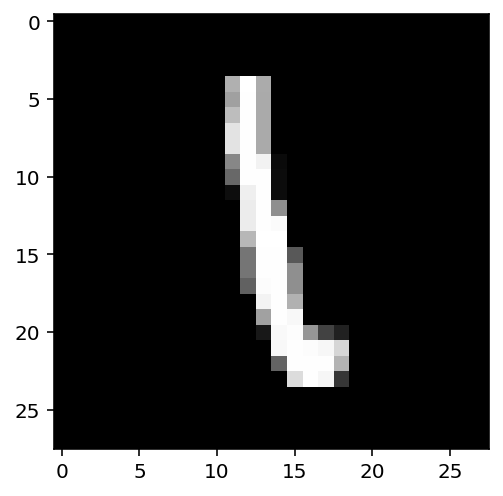

In [16]:
#Showing an image
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [17]:
b = images[1].numpy()
print(b.shape)

(1, 28, 28)


In [34]:
def activation(x):
    return 1/(1+torch.exp(-x))
#Flatten the input images
inputs = images.view(images.shape[0], -1)
#print(inputs.shape)
# create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h,w2) + b2
#h.shape
#out.shape
print(out)

tensor([[ 3.1454e+00,  4.3051e+00, -2.2658e+00,  7.9407e+00, -2.9872e+00,
          1.1467e+01, -3.1288e+00,  1.2524e+01, -5.9518e+00, -7.6576e+00],
        [ 7.0018e+00, -1.5942e+00, -2.8506e+00,  3.3681e+00, -1.6769e+00,
          1.7211e+01,  2.7814e+00,  2.0995e+00, -1.1705e+01, -1.4051e+01],
        [ 4.5965e+00,  6.6187e-02, -4.7708e-01,  5.5740e+00, -2.6772e+00,
          2.4529e+01,  4.5391e-01,  7.6256e+00, -2.2342e+01, -2.1363e+01],
        [ 5.1348e+00, -2.1440e+00, -1.4332e+01,  4.6694e+00,  6.4861e+00,
          2.2864e+01,  2.8755e+00,  2.6698e+00, -1.2278e+01, -1.8988e+01],
        [ 4.5252e+00,  7.4913e+00,  8.2282e-01,  1.0360e+01, -2.4679e-01,
          2.2911e+01,  9.6542e+00,  6.1688e+00, -3.0152e+00, -1.7105e+01],
        [ 1.2361e+01,  7.2247e+00, -1.1913e+01,  5.7226e+00,  9.6550e+00,
          2.3665e+01,  1.1943e+01,  1.8571e+01, -8.5303e+00, -5.4800e+00],
        [-1.3391e+00, -2.0354e+00, -1.1307e+01, -4.8477e+00, -3.5021e+00,
          2.8649e+01,  2.2403e+0

In [37]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim = 1).view(-1,1)
probabilities = softmax(out)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
